In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time


options = Options()
options.headless = True

# Download page
browser = webdriver.Chrome(options=options)
browser.get('https://breakingbad.fandom.com/wiki/Pilot')
soup = BeautifulSoup(browser.page_source, 'html.parser')

In [18]:
# Get number of live viewers
def get_viewers_count(soup):
    selectors = soup.find_all('h3', {'class': 'pi-data-label'})
    for selector in selectors:
        if selector.get_text() == 'U.S. Viewers':
            return selector.findNextSibling('div').get_text()
            
num_viewers = get_viewers_count(soup)
print('# U.S. viewers:', num_viewers)

# U.S. viewers: 1.41 million


In [10]:
""" Get the number of featured music """
def get_featured_music_count(soup):
    selector = soup.find('span', {'id': 'Featured_Music'})
    if selector is None:
        return 0
    selector = selector.parent.next_sibling.next_sibling
    return len(selector.find_all('li'))

num_featured_music = get_featured_music_count(soup)
print('# featured music:', num_featured_music)

# featured music: 15


In [13]:

def get_ref_count(soup):
    selector = soup.find('span', {'id': 'Cultural_references'})
    if selector is None:
        return 0
    selector = selector.parent.findNext('ul')
    return len(selector.find_all('li'))

num_refs = get_ref_count(soup)
print('# references:', num_refs)

# references: 2


In [15]:
def get_plot(soup):

    plot = []

    """ Extract text from Summary """
    selector = soup.find('span', {'id': 'Teaser'})
    txt = selector.parent.findNextSibling('p', {'class': None}).get_text()
    plot.append(txt)

    """ Extract text from each 'Act' """
    selectors = soup.find_all('span', {'id': lambda x: x and x.startswith('Act_')})
    for selector in selectors:
        txt = selector.parent.findNextSibling('p').get_text()
        plot.append(txt)

    # Clean up special characters
    for i, txt in enumerate(plot):
        txt = txt.replace(u'\xa0', u' ').replace('\n', '').replace("\'", '')
        plot[i] = txt
        
    plot = (' ').join(plot)
        
    return plot

plot = get_plot(soup)
print(plot)

In the desert outside of Albuquerque, New Mexico, a man wearing nothing but his underwear and a gas mask erratically drives an RV down a desolate highway. In the passenger seat, another man is passed out, also wearing a gas mask. In the back of the RV are two bodies. After crashing the RV in a ditch, the drivers climbs out, dons a shirt handing from the side view mirror, and retrieves a video camera and gun from the vehicle. Recording a message on the camera, the man identifies himself as Walter White and bids a cryptic farewell to his wife and son as sirens are heard in the distance. Walt then walks onto the road and awaits the apparent approach of police, gun in hand. Three weeks earlier, on his 50th birthday, Walt wakes up before dawn and exercises while contemplating of a plaque on his wall commemorating his contributions to research that won a Nobel Prize. At breakfast, his pregnant wife, Skyler, hands him a plate of eggs topped by veggie bacon spelling out "50". They banter with 

## Get list of URLs for each season

In [33]:
# Easier to hard code this

def get_season_urls():
    seasonUrls = [f'https://breakingbad.fandom.com/wiki/Season_{i+1}_(Breaking_Bad)' for i in range(4)]
    return seasonUrls
    

seasonUrls = get_season_urls()
for i, url in enumerate(seasonUrls):
        print(f'Season {i+1}: {url}')

Season 1: https://breakingbad.fandom.com/wiki/Season_1_(Breaking_Bad)
Season 2: https://breakingbad.fandom.com/wiki/Season_2_(Breaking_Bad)
Season 3: https://breakingbad.fandom.com/wiki/Season_3_(Breaking_Bad)
Season 4: https://breakingbad.fandom.com/wiki/Season_4_(Breaking_Bad)


## Get list of URLs for each episodes

In [17]:
# Get list of episodes
def get_episode_urls(url):
    baseUrl = 'https://breakingbad.fandom.com'
    
    # Download page
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    # Extract episode URLs
    episodeUrls = []
    selector = soup.find('div', {'data-source': 'episodes'})
    for link in selector.find_all('a'):
        url = f'{baseUrl}{link["href"]}'
        episodeUrls.append(url)
    return episodeUrls
        
episodeUrls = get_episode_urls('https://breakingbad.fandom.com/wiki/Season_1_(Breaking_Bad)')

for i, url in enumerate(episodeUrls):
    print(f'Episode {i+1}: {url}')

Episode 1: https://breakingbad.fandom.com/wiki/Pilot
Episode 2: https://breakingbad.fandom.com/wiki/Cat%27s_in_the_Bag...
Episode 3: https://breakingbad.fandom.com/wiki/...and_the_Bag%27s_in_the_River
Episode 4: https://breakingbad.fandom.com/wiki/Cancer_Man
Episode 5: https://breakingbad.fandom.com/wiki/Gray_Matter
Episode 6: https://breakingbad.fandom.com/wiki/Crazy_Handful_of_Nothin%27
Episode 7: https://breakingbad.fandom.com/wiki/A_No-Rough-Stuff-Type_Deal


In [21]:
def extract_episode_data(url, season_number, episode_number):
    # Download page
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    # Extract data
    data = {}
    data['season'] = season_number + 1
    data['episode'] = episode_number + 1
    data['live_viewership'] = get_viewers_count(soup)
    data['featured_music'] = get_featured_music_count(soup)
    data['media/cultural_refs'] = get_ref_count(soup)
    data['plot'] = get_plot(soup)
    
    return data


data = {}
season_number = 0    # hard-coded for testing purpose
for i, url in enumerate(episodeUrls):
    print(f'Extracting episode {i+1}: {url}')
    data[i+1] = extract_episode_data(url, season_number, i)
    time.sleep(3)

Extracting episode 1: https://breakingbad.fandom.com/wiki/Pilot
Extracting episode 2: https://breakingbad.fandom.com/wiki/Cat%27s_in_the_Bag...
Extracting episode 3: https://breakingbad.fandom.com/wiki/...and_the_Bag%27s_in_the_River
Extracting episode 4: https://breakingbad.fandom.com/wiki/Cancer_Man
Extracting episode 5: https://breakingbad.fandom.com/wiki/Gray_Matter
Extracting episode 6: https://breakingbad.fandom.com/wiki/Crazy_Handful_of_Nothin%27
Extracting episode 7: https://breakingbad.fandom.com/wiki/A_No-Rough-Stuff-Type_Deal


In [22]:
df = pd.DataFrame.from_dict(data, orient='index')
df

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
1,1,1,1.41 million,15,2,"In the desert outside of Albuquerque, New Mexi..."
2,1,2,1.49 million,6,0,Walt finishes having rough sex with Skyler and...
3,1,3,1.08 million,4,0,As Walt and Jesse are scrubbing up the dissolv...
4,1,4,1.09 million,7,2,"Hank puts his DEA team on notice that ""new pla..."
5,1,5,0.97 million,8,0,"Donning a jacket and tie, Jesse interviews for..."
6,1,6,1.07 million,8,0,"As he surveys the RV, Walt gives Jesse a stern..."
7,1,7,1.50 million,6,0,"At the high school, Walt and Skyler attend a P..."


# Extract data for every episode in every season

In [53]:
data_s1_to_4 = []
for season, seasonUrl in enumerate(get_season_urls()):
    for episode, episodeUrl in enumerate(get_episode_urls(seasonUrl)):
        print(f'Season {season+1}, Episode {episode+1}: {episodeUrl}')
        d = extract_episode_data(episodeUrl, season, episode)
        data_s1_to_4.append(d)
        time.sleep(1)
        
df_s1_to_4 = pd.DataFrame(data_s1_to_4)
df_s1_to_4

Season 1, Episode 1: https://breakingbad.fandom.com/wiki/Pilot
Season 1, Episode 2: https://breakingbad.fandom.com/wiki/Cat%27s_in_the_Bag...
Season 1, Episode 3: https://breakingbad.fandom.com/wiki/...and_the_Bag%27s_in_the_River
Season 1, Episode 4: https://breakingbad.fandom.com/wiki/Cancer_Man
Season 1, Episode 5: https://breakingbad.fandom.com/wiki/Gray_Matter
Season 1, Episode 6: https://breakingbad.fandom.com/wiki/Crazy_Handful_of_Nothin%27
Season 1, Episode 7: https://breakingbad.fandom.com/wiki/A_No-Rough-Stuff-Type_Deal
Season 2, Episode 1: https://breakingbad.fandom.com/wiki/Seven_Thirty-Seven
Season 2, Episode 2: https://breakingbad.fandom.com/wiki/Grilled
Season 2, Episode 3: https://breakingbad.fandom.com/wiki/Bit_by_a_Dead_Bee
Season 2, Episode 4: https://breakingbad.fandom.com/wiki/Down
Season 2, Episode 5: https://breakingbad.fandom.com/wiki/Breakage
Season 2, Episode 6: https://breakingbad.fandom.com/wiki/Peekaboo
Season 2, Episode 7: https://breakingbad.fandom.com/wi

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,1.41 million,15,2,"In the desert outside of Albuquerque, New Mexi..."
1,1,2,1.49 million,6,0,Walt finishes having rough sex with Skyler and...
2,1,3,1.08 million,4,0,As Walt and Jesse are scrubbing up the dissolv...
3,1,4,1.09 million,7,2,"Hank puts his DEA team on notice that ""new pla..."
4,1,5,0.97 million,8,0,"Donning a jacket and tie, Jesse interviews for..."
5,1,6,1.07 million,8,0,"As he surveys the RV, Walt gives Jesse a stern..."
6,1,7,1.50 million,6,0,"At the high school, Walt and Skyler attend a P..."
7,2,1,1.66 million,3,0,The episode opens on black and white shots of ...
8,2,2,1.60 million,2,0,"Out in the desert, Jesses car is riddled with ..."
9,2,3,1.13 million,2,0,"After burying Tucos gun in the desert, Walt an..."


In [36]:
episodeUrls = get_episode_urls('https://breakingbad.fandom.com/wiki/Season_5A_(Breaking_Bad)')
    
def extract_episode_data_5(url, episode_number):
    # Download page
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    # Extract data
    data = {}
    data['season'] = 5
    data['episode'] = episode_number + 1
    data['live_viewership'] = get_viewers_count(soup)
    data['featured_music'] = get_featured_music_count(soup)
    data['media/cultural_refs'] = get_ref_count(soup)
    data['plot'] = get_plot(soup)
    
    return data

data_5A = []
for i, url in enumerate(episodeUrls):
    print(f'Extracting episode {i+1}: {url}')
    data_5A.append(extract_episode_data_5(url, i))
    time.sleep(1)
    
df_5A = pd.DataFrame(data_5A)
df_5A

Extracting episode 1: https://breakingbad.fandom.com/wiki/Live_Free_or_Die
Extracting episode 2: https://breakingbad.fandom.com/wiki/Madrigal
Extracting episode 3: https://breakingbad.fandom.com/wiki/Hazard_Pay
Extracting episode 4: https://breakingbad.fandom.com/wiki/Fifty-One
Extracting episode 5: https://breakingbad.fandom.com/wiki/Dead_Freight
Extracting episode 6: https://breakingbad.fandom.com/wiki/Buyout
Extracting episode 7: https://breakingbad.fandom.com/wiki/Say_My_Name
Extracting episode 8: https://breakingbad.fandom.com/wiki/Gliding_Over_All


,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,5,1,2.93 million,3,0,"At a counter in a Dennys restaurant, a man ser..."
1,5,2,2.29 million,3,0,"At a test kitchen in Germany, Madrigal Electro..."
2,5,3,2.20 million,6,0,"Posing as a paralegal, Mike Ehrmantraut visits..."
3,5,4,2.29 million,3,0,"At an auto shop, a mechanic goes over some rec..."
4,5,5,2.48 million,1,0,"A young boy, Drew Sharp, rides through the des..."
5,5,6,2.81 million,3,0,"At the Vamonos Pest headquarters, Mike Ehrmant..."
6,5,7,2.98 million,5,0,"In the middle of the desert, Walter White addr..."
7,5,8,2.78 million,6,0,"Walt, in deep thought, is observing a fly at V..."


In [35]:
episodeUrls = get_episode_urls('https://breakingbad.fandom.com/wiki/Season_5B_(Breaking_Bad)')
    
def extract_episode_data_5B(url, episode_number):
    # Download page
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    # Extract data
    data = {}
    data['season'] = 5
    data['episode'] = episode_number + 9
    data['live_viewership'] = get_viewers_count(soup)
    data['featured_music'] = get_featured_music_count(soup)
    data['media/cultural_refs'] = get_ref_count(soup)
    data['plot'] = get_plot(soup)
    
    return data

data_5B = []
for i, url in enumerate(episodeUrls):
    print(f'Extracting episode {i+9}: {url}')
    data_5B.append(extract_episode_data_5B(url, i))
    time.sleep(3)
    
df_5B = pd.DataFrame(data_5B)
df_5B

Extracting episode 9: https://breakingbad.fandom.com/wiki/Blood_Money
Extracting episode 10: https://breakingbad.fandom.com/wiki/Buried
Extracting episode 11: https://breakingbad.fandom.com/wiki/Confessions
Extracting episode 12: https://breakingbad.fandom.com/wiki/Rabid_Dog
Extracting episode 13: https://breakingbad.fandom.com/wiki/To%27hajiilee
Extracting episode 14: https://breakingbad.fandom.com/wiki/Ozymandias
Extracting episode 15: https://breakingbad.fandom.com/wiki/Granite_State
Extracting episode 16: https://breakingbad.fandom.com/wiki/Felina


,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,5,9,5.92 million,7,0,"Following the purchase of the M60 (""Live Free ..."
1,5,10,4.77 million,4,0,An elderly man leaves his house in the still d...
2,5,11,4.85 million,10,0,"Outside a diner in Arizona, Todd Alquist leave..."
3,5,12,4.41 million,5,0,Walter White parks his car down the street fro...
4,5,13,5.11 million,8,0,"Jack, Kenny and Lydia Rodarte-Quayle observe t..."
5,5,14,6.37 million,5,0,In a flashback from Walter White and Jesse Pin...
6,5,15,6.58 million,5,0,Just as seen at the end of the previous episod...
7,5,16,10.28 million,8,0,With police searching for him in New Hampshire...


In [54]:
df = pd.concat([df_s1_to_4,df_5A, df_5B]).reset_index(drop=True)
df

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,1.41 million,15,2,"In the desert outside of Albuquerque, New Mexi..."
1,1,2,1.49 million,6,0,Walt finishes having rough sex with Skyler and...
2,1,3,1.08 million,4,0,As Walt and Jesse are scrubbing up the dissolv...
3,1,4,1.09 million,7,2,"Hank puts his DEA team on notice that ""new pla..."
4,1,5,0.97 million,8,0,"Donning a jacket and tie, Jesse interviews for..."
...,...,...,...,...,...,...
57,5,12,4.41 million,5,0,Walter White parks his car down the street fro...
58,5,13,5.11 million,8,0,"Jack, Kenny and Lydia Rodarte-Quayle observe t..."
59,5,14,6.37 million,5,0,In a flashback from Walter White and Jesse Pin...
60,5,15,6.58 million,5,0,Just as seen at the end of the previous episod...


In [55]:
df.to_csv('breaking_bad.csv')

<AxesSubplot:>

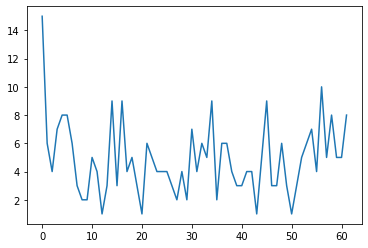

In [56]:
df.featured_music.plot()

In [78]:
df

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,1.41 million,15,2,"In the desert outside of Albuquerque, New Mexi..."
1,1,2,1.49 million,6,0,Walt finishes having rough sex with Skyler and...
2,1,3,1.08 million,4,0,As Walt and Jesse are scrubbing up the dissolv...
3,1,4,1.09 million,7,2,"Hank puts his DEA team on notice that ""new pla..."
4,1,5,0.97 million,8,0,"Donning a jacket and tie, Jesse interviews for..."
...,...,...,...,...,...,...
57,5,12,4.41 million,5,0,Walter White parks his car down the street fro...
58,5,13,5.11 million,8,0,"Jack, Kenny and Lydia Rodarte-Quayle observe t..."
59,5,14,6.37 million,5,0,In a flashback from Walter White and Jesse Pin...
60,5,15,6.58 million,5,0,Just as seen at the end of the previous episod...


In [84]:
df = df[ df['live_viewership'] != 'N/A' ]
df.head()

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,1.41 million,15,2,"In the desert outside of Albuquerque, New Mexi..."
1,1,2,1.49 million,6,0,Walt finishes having rough sex with Skyler and...
2,1,3,1.08 million,4,0,As Walt and Jesse are scrubbing up the dissolv...
3,1,4,1.09 million,7,2,"Hank puts his DEA team on notice that ""new pla..."
4,1,5,0.97 million,8,0,"Donning a jacket and tie, Jesse interviews for..."


In [72]:
df['live_viewership'].tolist()

['1.41 million',
 '1.49 million',
 '1.08 million',
 '1.09 million',
 '0.97 million',
 '1.07 million',
 '1.50 million',
 '1.66 million',
 '1.60 million',
 '1.13 million',
 '1.29 million',
 '1.21 million',
 '1.41 million',
 'N/A',
 '1.04 million',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '1.50 million',
 '1.95 million',
 '1.55 million',
 '1.33 million',
 '1.46 miilion',
 '1.61 million',
 '1.64 million',
 '1.52 million',
 '1.78 million',
 '1.61 million',
 '1.20 million',
 '1.32 million',
 '1.19 million',
 '1.56 million',
 '2.58 million',
 '1.97 million',
 '1.71 million',
 '1.83 million',
 '1.75 million',
 '1.67 milion',
 '1.91 million',
 '1.98 million',
 '1.89 million',
 '1.80 million',
 '1.55 million',
 '1.73 million',
 '1.90 million',
 '2.93 million',
 '2.29 million',
 '2.20 million',
 '2.29 million',
 '2.48 million',
 '2.81 million',
 '2.98 million',
 '2.78 million',
 '5.92 million',
 '4.77 million',
 '4.85 million',
 '4.41 million',
 '5.11 million',
 '6.37 million',
 '6.58 million',
 '10.28 m

In [87]:
df['live_viewership']= df['live_viewership'].apply(lambda x: x.replace('million', '').replace('miilion', '').replace('milion', '')).apply(float) 

In [88]:
df.head()


,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,1.41,15,2,"In the desert outside of Albuquerque, New Mexi..."
1,1,2,1.49,6,0,Walt finishes having rough sex with Skyler and...
2,1,3,1.08,4,0,As Walt and Jesse are scrubbing up the dissolv...
3,1,4,1.09,7,2,"Hank puts his DEA team on notice that ""new pla..."
4,1,5,0.97,8,0,"Donning a jacket and tie, Jesse interviews for..."


<AxesSubplot:>

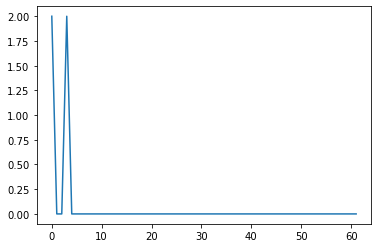

In [66]:
df['media/cultural_refs'].plot()

In [89]:
df.to_csv('breaking_bad.csv')

In [92]:
df = pd.read_csv('breaking_bad.csv')
df.head()

,Unnamed: 0,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,0,1,1,1.41,15,2,"In the desert outside of Albuquerque, New Mexi..."
1,1,1,2,1.49,6,0,Walt finishes having rough sex with Skyler and...
2,2,1,3,1.08,4,0,As Walt and Jesse are scrubbing up the dissolv...
3,3,1,4,1.09,7,2,"Hank puts his DEA team on notice that ""new pla..."
4,4,1,5,0.97,8,0,"Donning a jacket and tie, Jesse interviews for..."
